# Applying Conv Nets on MINIST data

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [2]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
from prettytable import PrettyTable
ptab = PrettyTable()
ptab.field_names = ["Model name", "test accuracy", "test log-loss"]

##  Model 1

In [6]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.1739 - acc: 0.9463 - val_loss: 0.0447 - val_acc: 0.9847
Epoch 2/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.0504 - acc: 0.9848 - val_loss: 0.0381 - val_acc: 0.9874
Epoch 3/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.0352 - acc: 0.9892 - val_loss: 0.0343 - val_acc: 0.9888
Epoch 4/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.0274 - acc: 0.9914 - val_loss: 0.0286 - val_acc: 0.9903
Epoch 5/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.0209 - acc: 0.9930 - val_loss: 0.0233 - val_acc: 0.9923
Epoch 6/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.0188 - acc: 0.9941 - val_loss: 0.0243 - val_acc: 0.9920
Epoch 7/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.0149 - acc: 0.9953 - val_loss: 0.

Test loss: 0.029028430455417583
Test accuracy: 0.9932


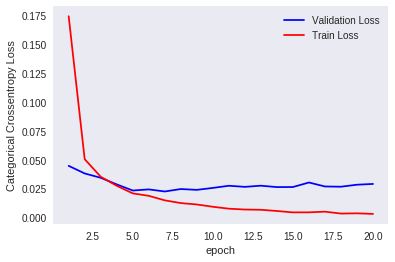

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
ptab.add_row(["3 layer convnet", score[1], score[0]])

## Model 2

In [9]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.6321 - acc: 0.7942 - val_loss: 0.1050 - val_acc: 0.9660
Epoch 2/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.2358 - acc: 0.9356 - val_loss: 0.0752 - val_acc: 0.9784
Epoch 3/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.1803 - acc: 0.9509 - val_loss: 0.0560 - val_acc: 0.9817
Epoch 4/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.1516 - acc: 0.9588 - val_loss: 0.0443 - val_acc: 0.9865
Epoch 5/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.1366 - acc: 0.9632 - val_loss: 0.0449 - val_acc: 0.9864
Epoch 6/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.1243 - acc: 0.9678 - val_loss: 0.0379 - val_acc: 0.9882
Epoch 7/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.1130 - acc: 0.9704 - val_loss: 0.0390 - 

Test loss: 0.02873982904376244
Test accuracy: 0.992


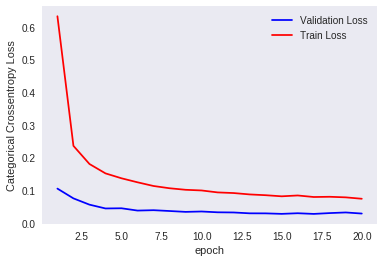

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
ptab.add_row(["5 layer convnet", score[1], score[0]])

# Model 3

In [12]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(2, 2),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 269us/step - loss: 1.4485 - acc: 0.4960 - val_loss: 0.3403 - val_acc: 0.9191
Epoch 2/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.6813 - acc: 0.7964 - val_loss: 0.2178 - val_acc: 0.9407
Epoch 3/20
60000/60000 [==============================] - 15s 255us/step - loss: 0.5417 - acc: 0.8467 - val_loss: 0.1675 - val_acc: 0.9526
Epoch 4/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.4716 - acc: 0.8685 - val_loss: 0.1543 - val_acc: 0.9578
Epoch 5/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.4292 - acc: 0.8821 - val_loss: 0.1403 - val_acc: 0.9604
Epoch 6/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.3986 - acc: 0.8938 - val_loss: 0.1274 - val_acc: 0.9632
Epoch 7/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.3725 - acc: 0.9016 - val_loss: 0.

Test loss: 0.08673970349109732
Test accuracy: 0.9754


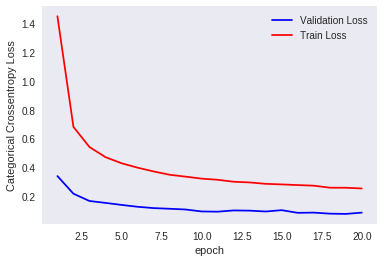

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
ptab.add_row(["7 layer convnet", score[1], score[0]])

# Conclusion:

In [15]:
print(ptab)

+-----------------+---------------+----------------------+
|    Model name   | test accuracy |    test log-loss     |
+-----------------+---------------+----------------------+
| 3 layer convnet |     0.9932    | 0.029028430455417583 |
| 5 layer convnet |     0.992     | 0.02873982904376244  |
| 7 layer convnet |     0.9754    | 0.08673970349109732  |
+-----------------+---------------+----------------------+
